In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cufflinks as cf
cf.go_offline()


In [3]:
from google.colab import files
uploaded = files.upload()

Saving realestatedata.csv to realestatedata.csv


In [4]:
df = pd.read_csv("realestatedata.csv")

In [5]:
df.head()

,Unnamed: 0,price,type.residential,no.beds,size.sq.meter,apart.area.name,area.name,category
0,1,100000.0,Apartment,1,751,MBL Residences,Jumeirah Lake Towers,Premium
1,2,200000.0,Apartment,3,2076,Al Jaz,Greens,Premium
2,3,79000.0,Apartment,1,708,Lake Almas West,Jumeirah Lake Towers,Premium
3,4,85000.0,Apartment,2,1194,Lake Almas East,Jumeirah Lake Towers,Premium
4,5,260000.0,Apartment,3,2159,Shoreline Apartments,Palm Jumeirah,Premium


In [6]:
df.describe()

,Unnamed: 0,price,size.sq.meter
count,7825.000000,7.690000e+03,7825.000000
mean,3913.000000,1.180778e+05,1125.422875
std,2259.027261,1.188686e+05,938.919030
min,1.000000,1.500000e+04,1.000000
25%,1957.000000,5.300000e+04,736.000000
50%,3913.000000,8.469400e+04,970.000000
75%,5869.000000,1.410000e+05,1402.000000
max,7825.000000,3.500000e+06,64999.000000


In [7]:
df["price_in_eur"] = df["price"].apply(lambda x: x*0.27)

In [8]:
df.drop(["Unnamed: 0","type.residential","price"], axis=1,inplace=True)

In [9]:
df.head()

,no.beds,size.sq.meter,apart.area.name,area.name,category,price_in_eur
0,1,751,MBL Residences,Jumeirah Lake Towers,Premium,27000.0
1,3,2076,Al Jaz,Greens,Premium,54000.0
2,1,708,Lake Almas West,Jumeirah Lake Towers,Premium,21330.0
3,2,1194,Lake Almas East,Jumeirah Lake Towers,Premium,22950.0
4,3,2159,Shoreline Apartments,Palm Jumeirah,Premium,70200.0


In [10]:
df["apart.area.name"].value_counts()

 Burj Khalifa Area                       156
 EMAAR Beachfront                        130
 Mankhool                                108
 The Address Residence Fountain Views    108
 Sobha Hartland                          107
                                        ... 
Sheikh Ahmed Square                        1
 Avenue Residence                          1
Sunrise Building                           1
Oceana                                     1
Building 18B                               1
Name: apart.area.name, Length: 849, dtype: int64

(array([3110.,    0.,  854.,    0., 2587.,    0., 1182.,    0.,   85.,
           7.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

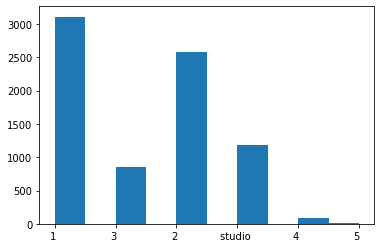

In [11]:
plt.hist(df["no.beds"])

In [12]:
df.shape

(7825, 6)

In [13]:
df.isnull().sum()

no.beds              0
size.sq.meter        0
apart.area.name    123
area.name            0
category             0
price_in_eur       135
dtype: int64

In [14]:
df2 = df.dropna()
df2.isnull().sum()


no.beds            0
size.sq.meter      0
apart.area.name    0
area.name          0
category           0
price_in_eur       0
dtype: int64

In [15]:
df2.shape

(7573, 6)

In [16]:
df1 = df[~df["apart.area.name"].isnull()]

In [17]:
df1.isnull().sum()

no.beds              0
size.sq.meter        0
apart.area.name      0
area.name            0
category             0
price_in_eur       129
dtype: int64

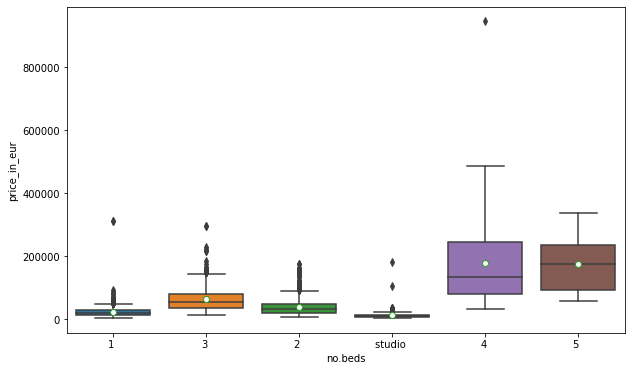

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="no.beds",y="price_in_eur",data=df1,showmeans=True,meanprops={"marker":"o","markerfacecolor":"white"})

In [19]:
beds_price = df1[['no.beds', 'price_in_eur']]
beds_price.pivot(columns='no.beds', values='price_in_eur').iplot(kind='box')

In [20]:
df1.rename(columns={"no.beds":"no_beds"},inplace=True)


In [21]:
df1.head()

,no_beds,size.sq.meter,apart.area.name,area.name,category,price_in_eur
0,1,751,MBL Residences,Jumeirah Lake Towers,Premium,27000.0
1,3,2076,Al Jaz,Greens,Premium,54000.0
2,1,708,Lake Almas West,Jumeirah Lake Towers,Premium,21330.0
3,2,1194,Lake Almas East,Jumeirah Lake Towers,Premium,22950.0
4,3,2159,Shoreline Apartments,Palm Jumeirah,Premium,70200.0


In [22]:
df1.dtypes

no_beds             object
size.sq.meter        int64
apart.area.name     object
area.name           object
category            object
price_in_eur       float64
dtype: object

In [23]:
def studio_to_numb(frame):
    beds = frame[0]
    
    if beds == "studio" or beds=="s":
        return "0"
    else:
        return beds

In [24]:
df1["no_beds"] = df1["no_beds"].apply(studio_to_numb)

In [25]:

df1["no_beds"] = pd.to_numeric(df1["no_beds"])

In [26]:
df1.dtypes

no_beds              int64
size.sq.meter        int64
apart.area.name     object
area.name           object
category            object
price_in_eur       float64
dtype: object

In [27]:
def impute_price(data_frame):
    no_beds = data_frame[0]
    price_in_eur = data_frame[1]
    
    if pd.isnull(price_in_eur):
        if no_beds == 1:
            return 18900
        elif no_beds == 2:
            return 32400
        elif no_beds == 3:
            return 55349
        elif no_beds == 4:
            return 135000
        elif no_beds == 5:
            return 175500
        elif no_beds == 0:
            return 9720
    
    else:
        return price_in_eur
        
    
    

In [28]:

df1["price_in_eur"] = df1[['no_beds','price_in_eur']].apply(impute_price,axis=1)

In [29]:
df1.isnull().sum()

no_beds            0
size.sq.meter      0
apart.area.name    0
area.name          0
category           0
price_in_eur       0
dtype: int64

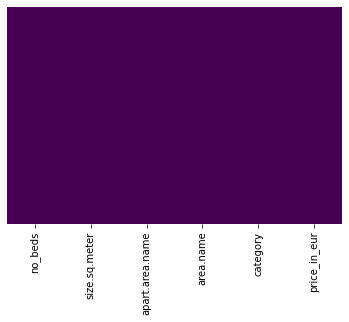

In [30]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
df1.shape

(7702, 6)

In [32]:
df2.shape

(7573, 6)

In [33]:
df1.head()

,no_beds,size.sq.meter,apart.area.name,area.name,category,price_in_eur
0,1,751,MBL Residences,Jumeirah Lake Towers,Premium,27000.0
1,3,2076,Al Jaz,Greens,Premium,54000.0
2,1,708,Lake Almas West,Jumeirah Lake Towers,Premium,21330.0
3,2,1194,Lake Almas East,Jumeirah Lake Towers,Premium,22950.0
4,3,2159,Shoreline Apartments,Palm Jumeirah,Premium,70200.0


In [34]:
location_stats = df1["apart.area.name"].value_counts()
location_stats

 Burj Khalifa Area                       156
 EMAAR Beachfront                        130
 Mankhool                                108
 The Address Residence Fountain Views    108
 Sobha Hartland                          107
                                        ... 
Sheikh Ahmed Square                        1
 Avenue Residence                          1
Sunrise Building                           1
Oceana                                     1
Building 18B                               1
Name: apart.area.name, Length: 849, dtype: int64

In [35]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [36]:
df1["apart.area.name"] = df1["apart.area.name"].apply(lambda x:"other" if x in location_stats_less_than_10 else x)

In [37]:
len(df1["apart.area.name"].unique())

190

In [38]:
df1["price_per_sqft"] = df1["price_in_eur"]/df1["size.sq.meter"]

In [39]:
df1.head()

,no_beds,size.sq.meter,apart.area.name,area.name,category,price_in_eur,price_per_sqft
0,1,751,MBL Residences,Jumeirah Lake Towers,Premium,27000.0,35.952064
1,3,2076,other,Greens,Premium,54000.0,26.011561
2,1,708,Lake Almas West,Jumeirah Lake Towers,Premium,21330.0,30.127119
3,2,1194,Lake Almas East,Jumeirah Lake Towers,Premium,22950.0,19.221106
4,3,2159,Shoreline Apartments,Palm Jumeirah,Premium,70200.0,32.515053


In [40]:
#It seems that most of apartments have price around 30 euros per sqft
df1["price_per_sqft"].describe()

count    7702.000000
mean       27.929349
std        19.246744
min         0.270004
25%        17.482014
50%        24.545455
75%        33.609959
max       632.022472
Name: price_per_sqft, dtype: float64

In [41]:
df1["price_per_sqft"].iplot(kind="histogram",bins=50)


In [42]:
len(df1[df1["price_per_sqft"]>100])

28

In [43]:
df1.shape

(7702, 7)

In [44]:
df1.drop(df1[df1["price_per_sqft"] > 100].index, inplace=True)

In [45]:
df1.shape

(7674, 7)

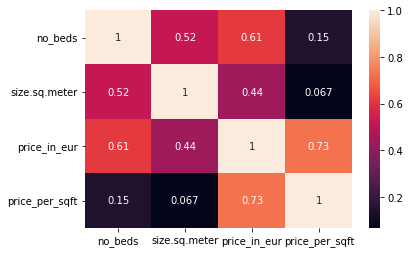

In [46]:
corelation = df1.corr()
sns.heatmap(data=corelation,annot=True)

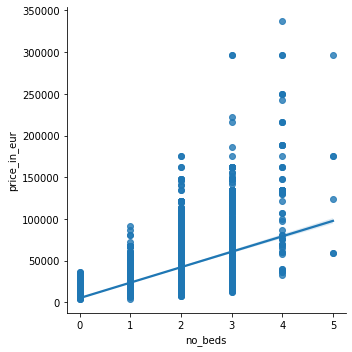

In [47]:
sns.lmplot(x="no_beds",y="price_in_eur",data=df1)

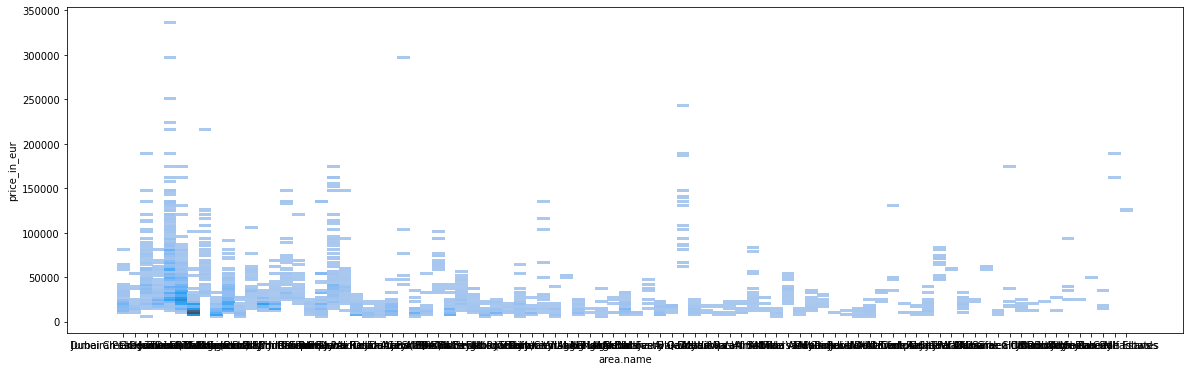

In [48]:
plt.figure(figsize=(20,6))
sns.histplot(data=df1,x="area.name",y="price_in_eur")

In [49]:
#Most expensive apartments are in Al Baraei, Downtown Dubai and Bluewaters
beds_price = df1[['area.name', 'price_in_eur']]
beds_price.pivot(columns='area.name', values='price_in_eur').iplot(kind='box')

Output hidden; open in https://colab.research.google.com to view.

In [50]:
# Apartments with most beds are located in DownTown Dubai but also Dubai Marina 
#beds_price = df1[['area.name', 'no_beds']]
#beds_price.pivot(columns='area.name', values='no_beds').iplot(kind='box')

In [51]:
proba = df1[df1["no_beds"]==0].describe()

In [52]:
proba["price_per_sqft"]["mean"]

25.17237895208184

In [53]:
for i in proba["price_per_sqft"]:
    print(i)

1152.0
25.17237895208184
10.27872680173162
8.80093131548312
18.054711246200608
22.17529945627734
30.000000000000004
70.23121387283237


In [54]:
df1.iplot(kind="bar",x="area.name",y=["no_beds","price_per_sqft"])

In [55]:
area_with_most_studios = df1[df1["no_beds"] == 0]["area.name"].sort_values(ascending=False).value_counts()[:10]

In [56]:
#Top 10 area with most studios
area_with_most_studios.iplot(kind="bar")

In [57]:
#Top 10 area with most one bed apartments
area_with_most_one_bed_apartments = df1[df1["no_beds"] == 1]["area.name"].sort_values(ascending=False).value_counts()[:10]
area_with_most_one_bed_apartments.iplot(kind="bar")

In [58]:
#Top 10 area with most two bed apartments
area_with_most_two_bed_apartments = df1[df1["no_beds"] == 2]["area.name"].sort_values(ascending=False).value_counts()[:10]
area_with_most_two_bed_apartments.iplot(kind="bar")

In [59]:
#Top 10 area with most three bed apartments
area_with_most_three_bed_apartments = df1[df1["no_beds"] == 3]["area.name"].sort_values(ascending=False).value_counts()[:10]
area_with_most_three_bed_apartments.iplot(kind="bar")

In [60]:
#Top 10 area with most three four beds apartments
area_with_most_four_bed_apartments = df1[df1["no_beds"] == 4]["area.name"].sort_values(ascending=False).value_counts()[:10]
area_with_most_four_bed_apartments.iplot(kind="bar")

In [61]:
#Top 10 area with most three five beds apartments
area_with_most_five_bed_apartments = df1[df1["no_beds"] == 5]["area.name"].sort_values(ascending=False).value_counts()[:10]
area_with_most_five_bed_apartments.iplot(kind="bar")

In [62]:
df1.head()

,no_beds,size.sq.meter,apart.area.name,area.name,category,price_in_eur,price_per_sqft
0,1,751,MBL Residences,Jumeirah Lake Towers,Premium,27000.0,35.952064
1,3,2076,other,Greens,Premium,54000.0,26.011561
2,1,708,Lake Almas West,Jumeirah Lake Towers,Premium,21330.0,30.127119
3,2,1194,Lake Almas East,Jumeirah Lake Towers,Premium,22950.0,19.221106
4,3,2159,Shoreline Apartments,Palm Jumeirah,Premium,70200.0,32.515053


In [63]:
df1 = pd.get_dummies(df1,columns=["category","area.name","apart.area.name"],drop_first=True)

In [64]:
df1.head()

,no_beds,size.sq.meter,price_in_eur,price_per_sqft,category_Premium,area.name_ Al Barsha,area.name_ Al Furjan,area.name_ Al Garhoud,area.name_ Al Jaddaf,area.name_ Al Kifaf,...,apart.area.name_The Torch,apart.area.name_The cove,apart.area.name_Tower 108,apart.area.name_Upper Crest,apart.area.name_Vezul Residence,apart.area.name_Vida Residence Downtown,apart.area.name_Wilton Terraces 1,apart.area.name_Wilton Terraces 2,apart.area.name_other,apart.area.name_wasl port views
0,1,751,27000.0,35.952064,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2076,54000.0,26.011561,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,708,21330.0,30.127119,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1194,22950.0,19.221106,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2159,70200.0,32.515053,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
df1[['size.sq.meter', 'price_in_eur', 'price_per_sqft']] = scaler.fit_transform(df1[['size.sq.meter', 'price_in_eur', 'price_per_sqft']])

In [67]:
df1.head()

,no_beds,size.sq.meter,price_in_eur,price_per_sqft,category_Premium,area.name_ Al Barsha,area.name_ Al Furjan,area.name_ Al Garhoud,area.name_ Al Jaddaf,area.name_ Al Kifaf,...,apart.area.name_The Torch,apart.area.name_The cove,apart.area.name_Tower 108,apart.area.name_Upper Crest,apart.area.name_Vezul Residence,apart.area.name_Vida Residence Downtown,apart.area.name_Wilton Terraces 1,apart.area.name_Wilton Terraces 2,apart.area.name_other,apart.area.name_wasl port views
0,1,0.007738,0.068826,0.372552,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0.028201,0.149798,0.268764,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0.007073,0.051822,0.311734,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.014579,0.056680,0.197866,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0.029483,0.198381,0.336666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = df1.drop(["price_in_eur"],axis="columns")
y = df1["price_in_eur"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8650530013384657

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([-1.85790550e+12,  8.65776883e-01, -3.66373537e+16, -1.51275899e+16,
       -9.37759135e+13])

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [76]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        "svm": {
            "model": SVR(),
            "params":{
                "kernel":['linear', 'poly', 'rbf'],
                'C': [1,10,100,1000],
                'gamma': [0.1, 0.5, 0.9]
            }
        },
        "random_forest":{
            "model": RandomForestRegressor(),
            "params":{
                "criterion": ["squared_error", "absolute_error"],
                
            }
        } ,
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,svm,0.736527,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
1,random_forest,0.995478,{'criterion': 'squared_error'}
2,lasso,-0.000824,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.985737,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [77]:
clf = RandomForestRegressor(criterion="squared_error")
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9948146615725663

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [80]:
import pickle
with open('DRE.pickle','wb') as f:
    pickle.dump(clf,f)